In [19]:
import numpy as np #lin. Alg.
import pandas as pd #data processing
import matplotlib.pyplot as plt
import matplotlib.image as matimg

#importing keras modules
import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model
from keras import backend as K
from keras import optimizers
import tensorflow as tf
import random



config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

#Python Image Library for image processing
from PIL import Image

import os

image_path = 'D:deep/mrlEyes/'

In [2]:
def get_im_array(f, size):
    im = Image.open(f).resize(size)
    return np.array(im)

print(len([f for f in os.listdir(image_path+'open')]))

42952


In [39]:
open_dir = image_path+ 'open/'
closed_dir = image_path+ 'closed/'

FINAL_SIDELEN = 25
FINAL_SHAPE = (FINAL_SIDELEN,FINAL_SIDELEN)

open_count = len([f for f in os.listdir(open_dir)])
closed_count = len([f for f in os.listdir(closed_dir)])

tt_split = .8

X_train = []
y_train = []
X_test = []
y_test = []


i = 0

open_files = random.sample(os.listdir(open_dir), open_count)
closed_files = random.sample(os.listdir(closed_dir), closed_count)

for f in open_files:
    if f.endswith('png'):
        if i<=tt_split*open_count:
            X_train.append(get_im_array(open_dir+f,FINAL_SHAPE))
            y_train.append(1)
        else:
            X_test.append(get_im_array(open_dir+f,FINAL_SHAPE))
            y_test.append(1)
        i+=1
        
print(i)
    
i = 0

for f in closed_files:
    if f.endswith('png'):
        if i<=tt_split*closed_count:
            X_train.append(get_im_array(closed_dir+f,FINAL_SHAPE))
            y_train.append(0)
        else:
            X_test.append(get_im_array(closed_dir+f,FINAL_SHAPE))
            y_test.append(0)
        i+=1
        
print(i)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
    
x_train = X_train.reshape(X_train.shape[0], FINAL_SIDELEN, FINAL_SIDELEN, 1)/255.
x_test = X_test.reshape(X_test.shape[0], FINAL_SIDELEN, FINAL_SIDELEN, 1)/255.  


42952
41946


In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67919, 25, 25, 1)
(16979, 25, 25, 1)
(67919,)
(16979,)


In [44]:
#HyperParamters
#Max Pooling Sizes
m_1 = 2
m_4 = 2
#Dropout values of the layers
d_1 = .4
d_2 = .4
#kernel sizes
k_1 = 3
k_2 = 3
k_3 = 3
k_4 = 3
#Convolution layer sizes
c_1 = 16
c_2 = 8
c_3 = 8

In [45]:
data_format = 'channels_last'

#Building model
model = Sequential()

model.add(Conv2D(c_1, kernel_size=(k_1, k_1), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(m_1,m_1)))

model.add(Conv2D(c_2, kernel_size=(k_2, k_2), activation='relu', padding='same'))


model.add(Conv2D(c_3, kernel_size=(k_4, k_4), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(m_4,m_4)))

model.add(Flatten())
model.add(Dropout(d_1))
model.add(Dense(16, activation='relu'))

model.add(Dropout(d_2))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 25, 25, 16)        160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 12, 12, 8)         1160      
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 12, 12, 8)         584       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 8)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 288)               0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 288)               0         
__________

In [47]:
#Number of epochs to train with
epoch_num = 100

model_log = model.fit(x_train, y_train, epochs=epoch_num, batch_size=2000, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Train on 67919 samples, validate on 16979 samples
Epoch 1/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.1301 - acc: 0.9572 - val_loss: 0.0953 - val_acc: 0.9648
Epoch 2/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.1291 - acc: 0.9571 - val_loss: 0.0941 - val_acc: 0.9653
Epoch 3/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.1268 - acc: 0.9572 - val_loss: 0.0965 - val_acc: 0.9644
Epoch 4/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.1269 - acc: 0.9571 - val_loss: 0.0989 - val_acc: 0.9635
Epoch 5/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.1220 - acc: 0.9588 - val_loss: 0.0905 - val_acc: 0.9673
Epoch 6/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.1235 - acc: 0.9590 - val_loss: 0.0893 - val_acc: 0.9679
Epoch 7/100
67919/67919 [==============================] - 1s 18us/step - loss: 0.1189 - acc: 0.9607 - val_loss: 0.0879 - 

67919/67919 [==============================] - 1s 19us/step - loss: 0.0851 - acc: 0.9713 - val_loss: 0.0601 - val_acc: 0.9787
Epoch 60/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.0841 - acc: 0.9718 - val_loss: 0.0612 - val_acc: 0.9775
Epoch 61/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.0874 - acc: 0.9697 - val_loss: 0.0605 - val_acc: 0.9786
Epoch 62/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.0862 - acc: 0.9711 - val_loss: 0.0601 - val_acc: 0.9789
Epoch 63/100
67919/67919 [==============================] - 1s 18us/step - loss: 0.0865 - acc: 0.9709 - val_loss: 0.0606 - val_acc: 0.9774
Epoch 64/100
67919/67919 [==============================] - 1s 18us/step - loss: 0.0847 - acc: 0.9712 - val_loss: 0.0634 - val_acc: 0.9783
Epoch 65/100
67919/67919 [==============================] - 1s 19us/step - loss: 0.0853 - acc: 0.9711 - val_loss: 0.0611 - val_acc: 0.9783
Epoch 66/100
67919/67919 [==============

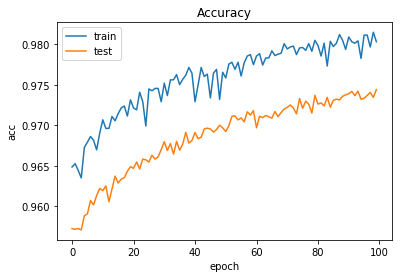

In [50]:
plt.plot(model_log.history['val_acc'])
plt.plot(model_log.history['acc'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
#Save a Keras model as an .h5 file
model.save('cassifeye.h5')

In [55]:
#Shows the image and prediction for the 'view_num' element of the test set.
view_num = 4


print('Prediction: ')
print(model.predict(x_test[view_num:view_num+1]))
print()
print('Correct: ')
print(y_test[view_num])

#Displays the image
img = Image.fromarray((X_test.reshape(X_test.shape[0], FINAL_SIDELEN, FINAL_SIDELEN, 1))[view_num], 'L')
im_array = np.asarray(img)
plt.imshow(im_array)
plt.show()


Prediction: 
[[0.9999968]]

Correct: 
1


ValueError: Too many dimensions: 3 > 2.